### Unsupervised Part

In [35]:
!pip install minisom
from minisom import MiniSom

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
dataset = pd.read_csv('credit_card_applications.csv')

In [38]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [41]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

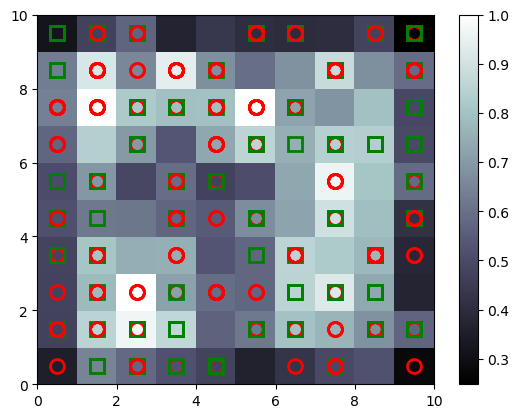

In [42]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
        markeredgewidth = 2)
show()

In [43]:
mappings = som.win_map(X)

In [45]:
frauds = np.concatenate((mappings[(2,2)], 
                         mappings[(5,7)],
                         mappings[(1,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)
df = pd.DataFrame(frauds, columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
fraud_customer = df['1']
fraud_customer

0     15795527.0
1     15802869.0
2     15800554.0
3     15750545.0
4     15662854.0
5     15745375.0
6     15638983.0
7     15654625.0
8     15623210.0
9     15570508.0
10    15617991.0
11    15641007.0
12    15665014.0
13    15593959.0
14    15629750.0
15    15605872.0
16    15592999.0
17    15593834.0
18    15611409.0
19    15636454.0
20    15608916.0
21    15615296.0
Name: 1, dtype: float64

### Supervised Part

In [46]:
customers = dataset.iloc[:, 1:].values
#don't take the customer ids

In [48]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer = sc.fit_transform(customers)

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim =15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 3)

Epoch 1/3
690/690 [==============================] - 1s 767us/step - loss: 0.2182 - accuracy: 0.9681
Epoch 2/3
690/690 [==============================] - 1s 754us/step - loss: 0.1567 - accuracy: 0.9681
Epoch 3/3
690/690 [==============================] - 1s 780us/step - loss: 0.1426 - accuracy: 0.9681


In [52]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
# :, 0:1 -> this makes 2D array, and y_pred was already a 2D array. Therefore we need to make dataset.iloc 2D array too.
# we add them horizontally, therefore axis = 1

22/22 [==============================] - 0s 619us/step


In [53]:
y_pred
#it's random 

array([[1.57761560e+07, 4.00236715e-03],
       [1.57395480e+07, 6.04659878e-02],
       [1.56628540e+07, 5.78471273e-02],
       ...,
       [1.56754500e+07, 6.53570369e-02],
       [1.57764940e+07, 1.39925499e-02],
       [1.55924120e+07, 9.48826224e-03]])

In [54]:
a= y_pred[:, 1].argsort()
a
#indexes are listed from lowest to highest 

array([149, 500, 267, 202, 196,  27, 559, 551, 240, 154, 419, 478, 520,
       615, 487, 413, 106, 375, 538,  80, 588, 105, 485, 591, 242, 137,
       398,  42, 603, 607, 222, 418, 139, 117, 458, 145, 620, 371, 348,
       574, 123, 391, 166, 502,  19, 679, 120, 575, 446, 593, 220, 379,
        49, 347, 450, 352, 385,  39, 228,  15, 119, 535, 229, 278, 219,
       581, 641,  79, 143, 126, 486, 182, 276,  74,  29, 233, 387, 609,
       115, 377, 437, 363, 598, 466, 247, 491, 610, 195, 642,  52,  69,
       488, 586, 497,  38, 471, 358,  58, 499, 200, 430, 241,  13,  10,
       434, 113, 614, 146, 316, 682, 455, 380, 440, 325, 463, 305, 480,
         7, 102, 286, 396, 264, 662, 666, 652, 118, 401,  63, 254, 457,
       564, 374, 604,  11,  33, 649,   0, 175, 653, 539, 601, 178,  64,
       128, 293, 412, 204, 684, 322, 130, 544, 655, 459, 243, 435, 279,
       426, 555, 406, 504, 468, 298, 594,  35, 627, 490, 360, 159,  20,
       676, 252, 523, 292, 367,  59, 602,  65, 217, 600, 103, 35

In [55]:
b=y_pred[y_pred[:, 1].argsort()]
b
# old index[149] -> new index[0]
# old index[500] -> new index[1]
# ...

array([[1.55988020e+07, 0.00000000e+00],
       [1.57901130e+07, 0.00000000e+00],
       [1.57627160e+07, 0.00000000e+00],
       ...,
       [1.56009750e+07, 1.51803836e-01],
       [1.56089160e+07, 1.68596432e-01],
       [1.57523440e+07, 1.89365491e-01]])

In [56]:
y_pred = y_pred[y_pred[:, 1].argsort()]
df = pd.DataFrame(y_pred, columns = ['ID', 'Procent'])
df

,ID,Procent
0,15598802.0,0.000000e+00
1,15790113.0,0.000000e+00
2,15762716.0,0.000000e+00
3,15664615.0,1.433508e-33
4,15708714.0,6.652149e-29
...,...,...
685,15615296.0,1.444473e-01
686,15815040.0,1.455970e-01
687,15600975.0,1.518038e-01
688,15608916.0,1.685964e-01
